In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os,fnmatch

In [2]:
music="/kaggle/input/heartbeat-sounds/set_a/"
import librosa
import IPython.display as ipd
x,sr=librosa.load(music+"normal__201106221418.wav",duration=5)
ipd.Audio(x,rate=sr)

In [3]:
def ses_df(music_folders,kolonlar,tür_liste):
    liste=[]
    adim=0
    for folder in music_folders:
        for tür in tür_liste:
            dosyalar=fnmatch.filter(os.listdir(folder),tür)
            label=tür.split("*")[0]
            for dosya in dosyalar:
                x,sr=librosa.load(folder+dosya,duration=5,res_type='kaiser_fast')
                liste.append([np.mean(x) for x in librosa.feature.mfcc(x,sr=sr)])
                liste[adim].append(sum(librosa.zero_crossings(x)))
                liste[adim].append(np.mean(librosa.feature.spectral_centroid(x)))
                liste[adim].append(np.mean(librosa.feature.spectral_rolloff(x,sr=sr)))
                liste[adim].append(np.mean(librosa.feature.chroma_stft(x,sr=sr)))
                liste[adim].append(label)
                liste[adim].append(dosya)
                adim+=1
    return pd.DataFrame(liste,columns=kolonlar)

In [4]:
music_folders=["/kaggle/input/heartbeat-sounds/set_a/","/kaggle/input/heartbeat-sounds/set_b/"]
kolonlar=["mfkk"+str(i) for i in range(20)]
for isim in ["zero","centroid","rolloff","chroma","tür","dosya"]:
    kolonlar.append(isim)
tür_liste=["normal*.wav","artifact*.wav","murmur*.wav"]
music_df=ses_df(music_folders,kolonlar,tür_liste)

/opt/conda/lib/python3.6/site-packages/librosa/core/pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [5]:
print(music_df.shape)
music_df.head()

(520, 26)


,mfkk0,mfkk1,mfkk2,mfkk3,mfkk4,mfkk5,mfkk6,mfkk7,mfkk8,mfkk9,...,mfkk16,mfkk17,mfkk18,mfkk19,zero,centroid,rolloff,chroma,tür,dosya
0,-369.186737,91.602280,8.740098,45.028103,21.458738,27.615288,17.346260,19.143579,14.277477,20.668922,...,6.130361,5.795323,4.890225,3.060663,1486,900.728824,2140.559896,0.750158,normal,normal__201101151127.wav
1,-502.835236,78.352989,67.204620,52.686039,38.776558,28.169607,21.536463,17.912798,15.713153,13.665859,...,2.295317,2.587525,2.667193,2.449412,518,129.665541,168.078613,0.777828,normal,normal__201108011118.wav
2,-591.205017,124.620209,-11.855297,13.405165,-1.701609,17.472918,-7.426212,14.575630,-2.211858,12.202884,...,-7.338869,-1.167344,-7.184093,-3.310456,13520,1853.659092,3514.721191,0.615507,normal,normal__201103221214.wav
3,-379.535004,118.246223,8.529406,19.718822,-3.027937,20.717892,0.050543,13.745317,-3.446706,18.079884,...,-11.210546,5.854636,-9.596210,7.771472,10657,1927.470131,4725.541178,0.635878,normal,normal__201102081152.wav
4,-323.073578,86.072052,11.979302,43.922356,5.751892,30.059065,1.344372,22.196846,-1.128754,17.246489,...,-4.582649,4.240902,-4.584909,2.583156,10453,2152.852009,5204.704793,0.653461,normal,normal__201105021654.wav


In [6]:
music_df["tür"].value_counts()

normal      351
murmur      129
artifact     40
Name: tür, dtype: int64

In [7]:
X=music_df.iloc[:,0:24]
X.head()

,mfkk0,mfkk1,mfkk2,mfkk3,mfkk4,mfkk5,mfkk6,mfkk7,mfkk8,mfkk9,...,mfkk14,mfkk15,mfkk16,mfkk17,mfkk18,mfkk19,zero,centroid,rolloff,chroma
0,-369.186737,91.602280,8.740098,45.028103,21.458738,27.615288,17.346260,19.143579,14.277477,20.668922,...,10.951164,7.448577,6.130361,5.795323,4.890225,3.060663,1486,900.728824,2140.559896,0.750158
1,-502.835236,78.352989,67.204620,52.686039,38.776558,28.169607,21.536463,17.912798,15.713153,13.665859,...,2.541654,2.136892,2.295317,2.587525,2.667193,2.449412,518,129.665541,168.078613,0.777828
2,-591.205017,124.620209,-11.855297,13.405165,-1.701609,17.472918,-7.426212,14.575630,-2.211858,12.202884,...,-1.379878,4.200771,-7.338869,-1.167344,-7.184093,-3.310456,13520,1853.659092,3514.721191,0.615507
3,-379.535004,118.246223,8.529406,19.718822,-3.027937,20.717892,0.050543,13.745317,-3.446706,18.079884,...,-7.436246,7.344613,-11.210546,5.854636,-9.596210,7.771472,10657,1927.470131,4725.541178,0.635878
4,-323.073578,86.072052,11.979302,43.922356,5.751892,30.059065,1.344372,22.196846,-1.128754,17.246489,...,-6.213536,5.784326,-4.582649,4.240902,-4.584909,2.583156,10453,2152.852009,5204.704793,0.653461


In [8]:
y=music_df["tür"]
y.head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: tür, dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder().fit(y)
y=le.transform(y)
y[10:40]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=31)
print("X Train: ",len(X_train),"\n","X Test: ",len(X_test),sep="")

X Train: 390
X Test: 130


In [11]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(max_depth= 8,
 max_features= 5,
 min_samples_split=5,
 n_estimators=500).fit(X_train,y_train)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
from sklearn.metrics import accuracy_score
y_pred=forest.predict(X_test)
accuracy_score(y_test,y_pred)

0.8461538461538461

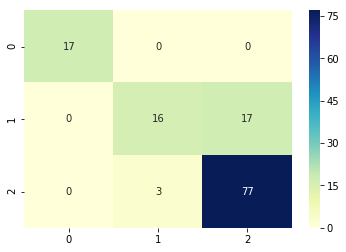

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="YlGnBu")

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [15]:
mlp=MLPClassifier().fit(X_train_scaled,y_train)
mlp

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
y_pred=mlp.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.7923076923076923

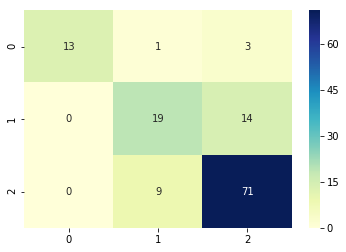

In [17]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="YlGnBu")